#### ==============================================================================================================
### nanoERA PIPELINE VALIDATION PROJECT

#### OBJECTIVES 

#### 1) Compare the predicted consensus generation by nanoERA with the ones from GOG-UK database using ARTIC pipeline by computing the sequence identity match (IDM) and missmatch count (MMC).  

#### 2) Test multiple pipeline parameters and check IDM and MMC for optimal performance.

#### 3) Multiple variables analysis to explore which conditions may affect pipeline results.

#### 4) Compare concensus generated using pipeline implemented in the INSAflu platform with command line nanoERA. 

#### =============================================================================================================

In [54]:
# STEP 1  Extracting GOG-UK data and the nanoERA data results report 

path = "/home/ricardo/TELE-VIRproject/NANOporeTESTdata/GOG_Covid19_Validation_dataset"

# Function for pulling out results from nanoERA csv results file into a list of Results

def ExtractERAreportResultsFromFILE( path, folder ):
    ReportFile = path +"/"+folder + "/DataProcessingReport.csv"
    n = 0
    results = []
    F1 = open(ReportFile)
    for line in F1: 
        if n!=0: 
            results.append(line.split(","))
        n=n+1
    F1.close()
    return results


# results with variation of head and tail trimming  (considers a constant Q10 and coverage of 30)
ResT40 = ExtractERAreportResultsFromFILE( path, "nanoERA_results_ValidP1" )
ResT70 = ExtractERAreportResultsFromFILE( path, "nanoERA_results_ValidP2a" ) 

# results with variation of base error selection 
# considers a constant head and tailtrimming of 70 and coverage of 30
ResQ7 = ExtractERAreportResultsFromFILE( path, "nanoERA_results_ValidP5" )
ResQ8 = ExtractERAreportResultsFromFILE( path, "nanoERA_results_ValidP4" )
ResQ9 = ExtractERAreportResultsFromFILE( path, "nanoERA_results_ValidP3" )
ResQ10 = ResT70 

# Check size of samples and data of on a sample 
print(len(ResQ10))
print (ResQ10[0])


200
['ERR4569681', '/home/ricardo/TELE-VIRproject/NANOporeTESTdata/GOG_Covid19_Validation_dataset/nanoERA_results_ValidP2a/ERR4569681/consensus.fasta', '10', '14.1', '508.0', '36217', '18399474.0', '447', '29908', '2747', '13', '6', '3', '9', '14.3', '507.9', '34928', '17741265.0\n']


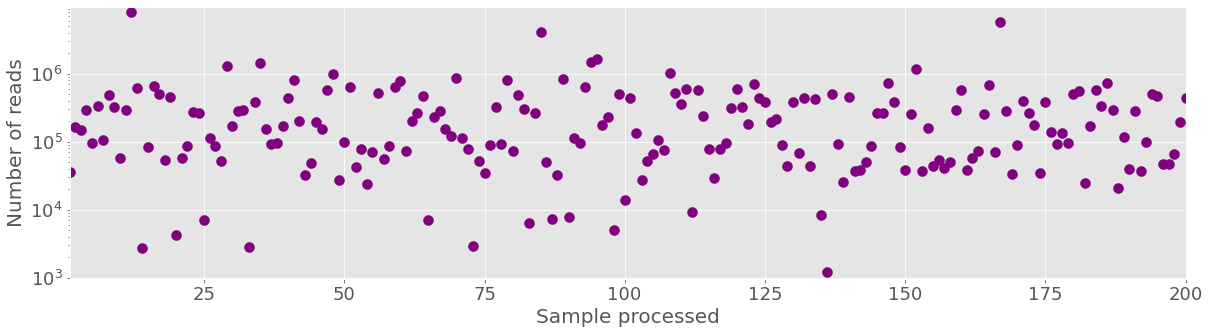

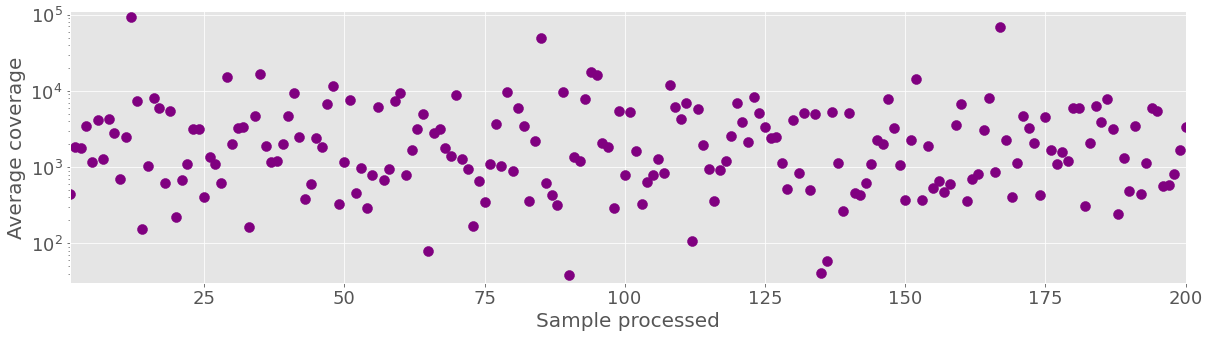

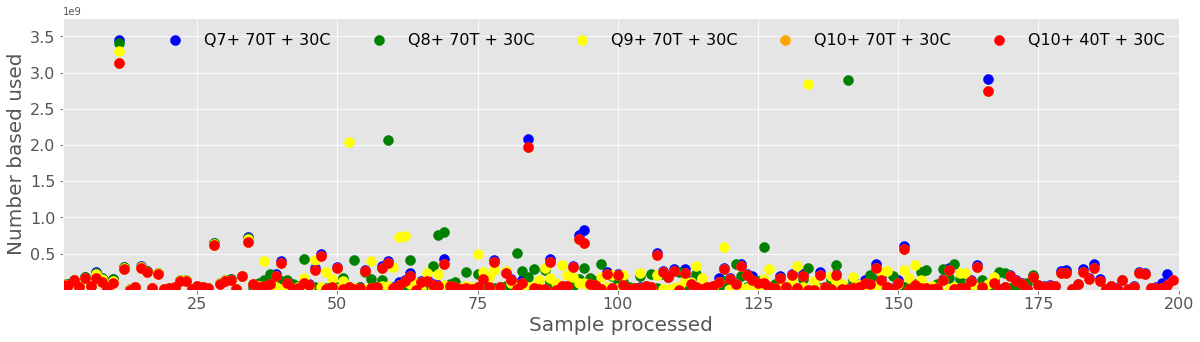

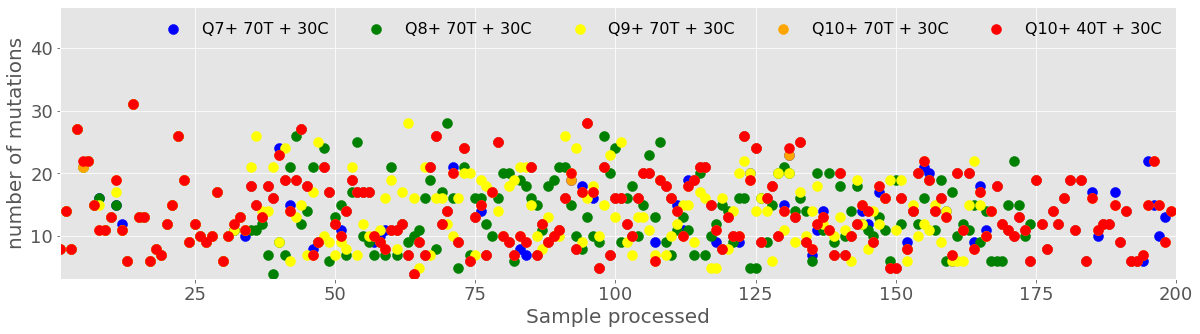

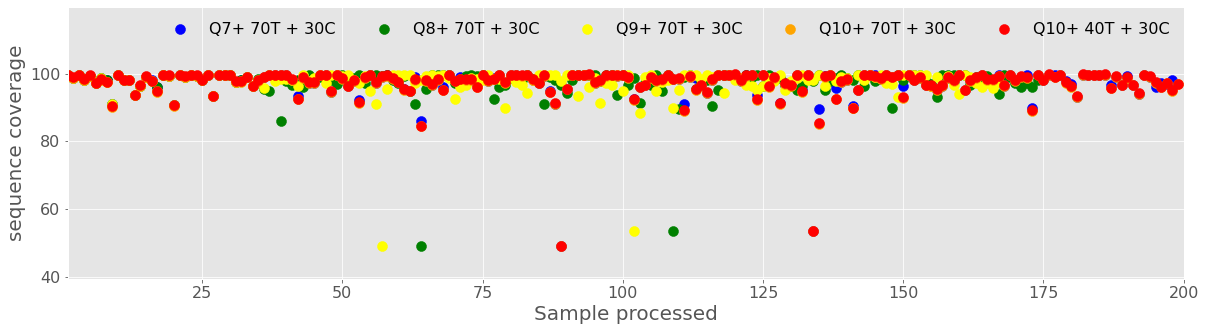

In [74]:
# SEPT 2 PLOT GOG DATASET FEATURES REVEVANT FOR AFFECTING THE OVERAL RESULTS   

import numpy as np 
import matplotlib.pyplot as plt

#setting the style and size of plots to generate
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (20,5)


Samples_index = [i for i in range(1,201)]
SamplesID = [data[0] for data in ResT70]
Coverages = [float(data[7]) for data in ResT70]
NumberReads = [float(data[5]) for data in ResT70]


Yname = ["Number of reads","Average coverage"] 
DATA = [ NumberReads, Coverages ]
Type = ["log", "log"]
plt.rcParams["figure.figsize"] = (20,5)

#Ploting data characteristics
for i in range(2):
    plt.clf()
    plt.style.use("ggplot")
    plt.rcParams["figure.figsize"] = (20,5)
    plt.xlabel('Sample processed', size = 20)
    plt.ylabel(Yname[i], size = 20)
    plt.yscale(Type[i])
    plt.tick_params(axis = "both", labelsize = 18)
    plt.scatter( Samples_index, DATA[i], color ="purple", s=100  )
    plt.axis([1, 200 , min(DATA[i])*0.8 , max(DATA[i])*1.2 ])
    plt.show() 

# Defining the result data to compare
SET_results = [ResQ7, ResQ8, ResQ9, ResQ10, ResT40]
LABELS = [ "Q7+ 70T + 30C", "Q8+ 70T + 30C", "Q9+ 70T + 30C", "Q10+ 70T + 30C", "Q10+ 40T + 30C"]
COLOR = ["blue", "green", "yellow", "orange", "red"] 
plt.rcParams["figure.figsize"] = (20,5)

# Ploting number of reads used apon filtering   
plt.clf()
for i, results in enumerate(SET_results):
    NBases = [float(data[-1]) for data in results ]
    plt.xlabel('Sample processed', size = 20)
    plt.ylabel("Number based used", size = 20)
    plt.tick_params(axis = "both", labelsize = 16)
    plt.scatter( [i for i in range(len(NBases))], NBases, color = COLOR[i], s = 100, label = LABELS[i] )
plt.legend(fontsize=16, frameon=False, ncol=5 )
plt.axis([1, 200 , min(NBases)*0.8 , max(NBases)*1.2 ])
plt.show() 

# Ploting detected mutations variations   
plt.clf()
for i, results in enumerate(SET_results):
    Mutations = [float(data[10]) for data in results]
    plt.xlabel('Sample processed', size = 20)
    plt.ylabel("number of mutations", size = 20)
    plt.tick_params(axis = "both", labelsize = 18)
    plt.scatter( [i for i in range(len(Mutations))], Mutations, color = COLOR[i], s = 100, label = LABELS[i] )
plt.legend(fontsize=16, frameon=False, ncol=5)
plt.axis([1, 200 , min(Mutations)*0.8 , max(Mutations)*1.5 ])
plt.show() 

# Ploting sequence coverage variations   
plt.clf()
for i, results in enumerate(SET_results):
    SeqPercentage = [(1 - float(data[9])/float(data[8]))*100 for data in results]
    plt.xlabel('Sample processed', size = 20)
    plt.ylabel("sequence coverage", size = 20)
    plt.tick_params(axis = "both", labelsize = 16)
    plt.scatter( [i for i in range(len(SeqPercentage))], SeqPercentage, color = COLOR[i], s = 100, label = LABELS[i] )
plt.legend(fontsize=16, frameon=False, ncol=5 )
plt.axis([1, 200 , min(SeqPercentage)*0.8 , max(SeqPercentage)*1.2 ])
plt.show() 


### COMMENTS:

#### GOG-UK DATASET has a wide range (4 orders of magnitude) of number of reads and coverage,  which is suitable to test robustness on the variation of these parameters 

####  Apparently, the qualty reads filtering impacts the number of total mutations predicted by medaka.  

####  Sequence coverage also vary but just in few number of cases. This can be used to test the pipeline behaviour in such cases.


In [2]:
#open and extract GOG UK metadata 

MetadataGOGfile = "/home/ricardo/TELE-VIRproject/NANOporeTESTdata/GOG_Covid19_Validation_dataset/COG-UK_200seq_MinION_dataset.csv" 
n, samplesIDs =0, []

F2 = open(MetadataGOGfile)
for line in F2:
    if n!=0: 
        data = line.split(",")
        samplesIDs.append(  (data[3] , data[11]) )  
    n=n+1
F2.close()

print("Reads IDs        Consensus IDs ")
print("..................................................")
for i in range(10):
    print(samplesIDs[i][0], "\t" , samplesIDs[i][1] )
    

print("......................cont........................")
print("total samples = ",len(samplesIDs)  )

Reads IDs        Consensus IDs 
..................................................
ERR4082030 	 CAMB-7379A
ERR4082037 	 CAMB-73800
ERR4082047 	 CAMB-738F1
ERR4082049 	 CAMB-7393A
ERR4082101 	 CAMB-7440B
ERR4082108 	 CAMB-74492
ERR4082114 	 CAMB-74526
ERR4082116 	 CAMB-74544
ERR4082124 	 CAMB-745DB
ERR4082129 	 CAMB-74641
......................cont........................
total samples =  200


In [170]:
# TESTING THE MATCH AND MISMATCH OF A SEQUENCE MODEL  

seqX1 = "XXXXACTATCGXTTTTCCCAATCTAAAXXXXXXX" 
seqX2 = "XXXXACTATCGXTTATCCCAATCTAAAXXXXXXX"  # add and T-> A mutation 
seqX3 = "XXXXACTCGXTTATCCCAATCTAAAXXXXXXX"  # add and T-> A mutation and Deleted an TA 


alignerT = Align.PairwiseAligner()
alignerT.match_score = 1
alignerT.mismatch_score = 1
alignerT.gap_score = 0
print ("Match + Mismatch score settings\n ",alignerT)

alignerX = Align.PairwiseAligner()
alignerX.match_score = 1
alignerX.mismatch_score = 0
alignerX.gap_score = 0
print ("Match score settings\n ", alignerX)


scoreXX = alignerT.score(seqX1,seqX2)
scoreX = alignerX.score(seqX1,seqX2)

print("sequence model and mutations:\n", seqX1, "(original) \n", seqX2, "(T-->A SNP)" )
print("\tComputed Match + Mismatch score = ",scoreXX) 
print("\tComputed match score = ", scoreX) 
print("\tComputed missmatch score = ", scoreXX-scoreX )

scoreXX = alignerT.score(seqX1,seqX3)
scoreX = alignerX.score(seqX1,seqX3)
print("\n\nsequence model and mutations:\n", seqX1, "(original) \n", seqX3, "(T-->A SNP + Deletions)" )
print("\tComputed Match + Mismatch score = ",scoreXX) 
print("\tComputed match score = ", scoreX) 
print("\tComputed missmatch score = ", scoreXX-scoreX )


Match + Mismatch score settings
  Pairwise sequence aligner with parameters
  match_score: 1.000000
  mismatch_score: 1.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: global

Match score settings
  Pairwise sequence aligner with parameters
  match_score: 1.000000
  mismatch_score: 0.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.0000

### COMMENTS:

#### The alignment method and ID match calculations based on scoring and the above setting is accurate for computing only the matching regions and estimate the missmatch bases


In [122]:
# COMPUTING ID MATCH AND MISMATCH COUNT FOR ALL PARAMETERES
# IDmatch and mismatches count are computed against both ARTIC AND REFERENCE consensus sequence. 


#function for getting sequence and identifier from a fasta file   
#-------------------------------------------------------------------------------------------------------------------------- 
def import_seqs(fasta_file):
    """ 
    Imports sequences from a FASTA file path (fasta_file).
    returns a list of list
    List with one sublist per sequence in the FASTA file. Each sublist has two elements: 
    The identifier/header of the sequence  (str) and the sequence (str).
    """
    seqs = []
    nuc_to_NUC = {"a": "A","c":"C", "t":"T", "g":"G"}
    for record in SeqIO.parse(fasta_file, 'fasta'):
        seqid = record.id
        sequence = str(record.seq)
        sequence_new = ""
        if sequence[1] in ["a", "c", "t", "g" ]: 
            for nuc in sequence:
                sequence_new = sequence_new + str(nuc_to_NUC.get(nuc))
            seqs.append([seqid, sequence_new])
        else:
            seqs.append([seqid, sequence])
    return seqs
#-------------------------------------------------------------------------------------------------------------------------- 

Reference = "/home/ricardo/TELE-VIRproject/NANOporeTESTdata/SARS_CoV_2_Wuhan_Hu_1_MN908947.fasta"
articConsensusFile = "/home/ricardo/TELE-VIRproject/NANOporeTESTdata/GOG_Covid19_Validation_dataset/COG_UK_Dataset_200seqs.fasta"

from Bio import SeqIO
from Bio import Align

# Importing the Artic consenus sequences 
ArticSeqs = import_seqs(articConsensusFile)

#Importing reference sequence 
RseqInfo =  SeqIO.read( Reference , "fasta")
Rseq = RseqInfo.seq 


def replaceNwithX(sequence):
    new_sequence = ""
    for base in sequence:
        if base =="N":
            new_sequence = new_sequence + "X"
        else:
            new_sequence = new_sequence + base
    return new_sequence

# Set the ordered list of results data for each nanoERA pipeline run with distinct parameters   
SET_results = [ResQ7, ResQ8, ResQ9, ResQ10, ResT40]
LABELS = [ "Q7+ 70T + 30C", "Q8+ 70T + 30C", "Q9+ 70T + 30C", "Q10+ 70T + 30C", "Q10+ 40T + 30C"]

# defining the storing lists for the lists containing all computed finding pars and allign 
IDREF = []
IDVALID = []
MISSMATCH = []
MISSREFS = []
InfoSAMPLES = []
IDsNAmes = [] 

# Aligner defenition for match score 
aligner1 = Align.PairwiseAligner()
aligner1.match_score = 1.0
aligner1.mismatch_score = 0
aligner1.gap_score = 0

# Aligner defenition for match + missmatch score 
aligner2 = Align.PairwiseAligner()
aligner2.match_score = 1.0
aligner2.mismatch_score = 1.0
aligner2.gap_score = 0


for j in range(len(SET_results)):
    print("\n Computing IDmatch and missmatch for nanoERA piplene with the parameters = ", LABELS[j],":")
    print("===============================================================================================")
    k = 0
    print("N  sampleID", "\t" , "      % IDref ",  "\t" ,  "% IDart ", "\t" , "Bmiss", "\t", "E NNs", "\t", "A NNs", "\t", "seqLenght var(bases)" )
    IDmatchR, IDmatchA, missmatches, idsamp, infosamp, refmiss = [],[],[],[],[],[]  
    for seq in ArticSeqs:
        IDseq = seq[0].split('/')[1]
        Aseq = seq[1]
        Aseq2 = replaceNwithX(Aseq)
        N_A = Aseq.count("N")
        seqE_path = "not found"
        sampleID = "" 
        for ID in samplesIDs:
            if ID[1] == IDseq:
                for info in SET_results[j]:
                    if ID[0] == info[0] or ID[0] == info[0][0:-2] :
                        seqE_path = info[1]
                        sampleID = info[0]
                        INFO = info
        if seqE_path !="not found":
            seqEinfo = SeqIO.read( seqE_path , "fasta")  
            Eseq = seqEinfo.seq
            Eseq2 = replaceNwithX(Eseq)       
            N_E = Eseq.count("N")
            nMatch_artic = aligner1.score(Eseq2, Aseq2)
            tMatch_artic = aligner2.score(Eseq2, Aseq2)  # includes NNN match
            nMatch_ref = aligner1.score(Eseq2, Rseq)
            tMatch_ref = aligner2.score(Eseq2, Rseq)
            pIDA = nMatch_artic / tMatch_artic *100
            pIDR = nMatch_ref / tMatch_ref *100 
            nMismatch = int(tMatch_artic - nMatch_artic)
            nRefMissmatch = int(tMatch_ref - nMatch_ref)
            SeqLengDiff = abs(len(Iseq)- len(Eseq))
            IDmatchR.append(pIDR)
            IDmatchA.append(pIDA)
            missmatches.append(nMismatch) 
            idsamp.append(sampleID)
            infosamp.append(INFO)
            refmiss.append(nRefMissmatch)
            k = k + 1
            IDD = sampleID + "      "
            print(k,IDD[:15] , "\t" , round(pIDR, 3), "   \t" , round(pIDA, 3), "  \t" , int(nMismatch), "  \t", N_E, "\t", N_A, "    \t", SeqLengDiff )
        else: 
            k = k + 1
            print(k,sampleID, "not align")
    print("===============================================================================================")
    IDREF.append(IDmatchR)
    IDVALID.append(IDmatchA)
    MISSMATCH.append(missmatches)
    MISSREFS.append(refmiss)
    InfoSAMPLES.append(infosamp)
    IDsNAmes.append(idsamp)
    
    


 Computing IDmatch and missmatch for nanoERA piplene with the parameters =  Q7+ 70T + 30C :
N  sampleID 	       % IDref  	 % IDart  	 Bmiss 	 E NNs 	 A NNs 	 seqLenght var(bases)
1 ERR4242993_1    	 99.98    	 99.939   	 18   	 279 	 121     	 1
2 ERR4806965      	 99.933    	 99.993   	 2   	 141 	 121     	 0
3 ERR4807157      	 99.928    	 99.828   	 50   	 800 	 418     	 0
4 ERR4806307      	 99.894    	 99.557   	 129   	 793 	 667     	 5
5 ERR4807269      	 99.933    	 99.993   	 2   	 141 	 121     	 0
6 ERR4807138      	 99.949    	 99.942   	 17   	 335 	 376     	 4
7 ERR4806106      	 99.904    	 99.643   	 104   	 797 	 715     	 1
8 ERR4806506      	 99.926    	 99.915   	 25   	 344 	 373     	 1
9 ERR4808041      	 99.943    	 99.993   	 2   	 141 	 121     	 0
10 ERR4806520      	 99.952    	 99.819   	 53   	 560 	 421     	 2
11 ERR4807447      	 99.923    	 99.983   	 5   	 169 	 121     	 3
12 ERR4806373      	 99.932    	 99.932   	 20   	 581 	 673     	 3
13 E

### COMMENTS:

####  All data form COG-UK  was sucessufuly compared with nanoERA pipeline consensus generation for all settings explored

#### Settings:   Q is quality filtering and varied from 7 to 10 ( 50-10% base error associated )
####                   T is trimming heat and tail 
####                   C coverage cutoff for masking the reads 

#### There are substantial differences between ID match of nanoERA and the published ARTIC consensus

#### nanoERA is closer to the Reference in comparison with ARTIC, sugests ARTIC are less realistic 

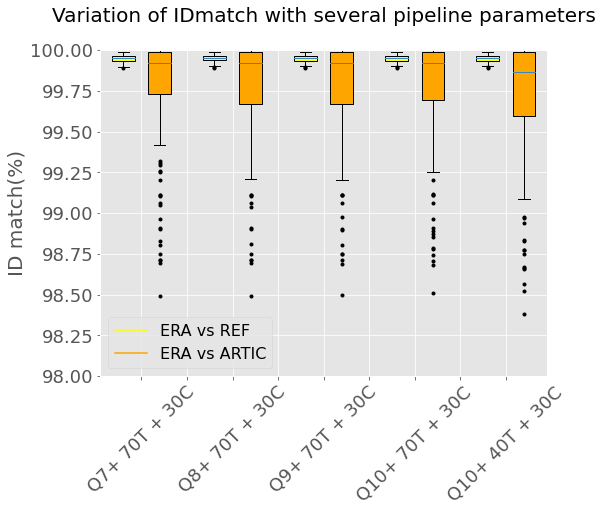

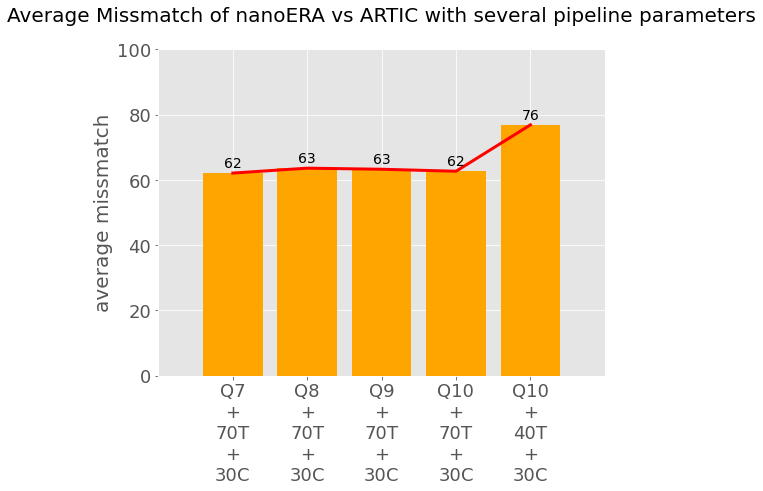


ID MATCH COUNTS FOR SEVERAL PIPELINE PARAMETERIZATION:


Settings =  Q7+ 70T + 30C
ID variation count (E vs A)  0%       =  5 ( 2.5 %)
ID variation count (E vs A)  0-0.1%   =  114 ( 57.3 %)
ID variation count (E vs A)  0.1-0.5% =  46 ( 23.1 %)
ID variation count (E vs A)  > 0.5%   =  34 ( 17.1 %)

Settings =  Q8+ 70T + 30C
ID variation count (E vs A)  0%       =  5 ( 2.9 %)
ID variation count (E vs A)  0-0.1%   =  96 ( 54.9 %)
ID variation count (E vs A)  0.1-0.5% =  43 ( 24.6 %)
ID variation count (E vs A)  > 0.5%   =  31 ( 17.7 %)

Settings =  Q9+ 70T + 30C
ID variation count (E vs A)  0%       =  5 ( 3.0 %)
ID variation count (E vs A)  0-0.1%   =  96 ( 57.1 %)
ID variation count (E vs A)  0.1-0.5% =  37 ( 22.0 %)
ID variation count (E vs A)  > 0.5%   =  30 ( 17.9 %)

Settings =  Q10+ 70T + 30C
ID variation count (E vs A)  0%       =  5 ( 2.5 %)
ID variation count (E vs A)  0-0.1%   =  111 ( 55.5 %)
ID variation count (E vs A)  0.1-0.5% =  51 ( 25.5 %)
ID variation count (E vs A)  >

In [204]:
# VISUALIZATION OF PIPELINE VALIDATION METRICS (%ID MATCH and CUMULATIVE MISSMATCH COUNT)

import numpy as np

# Boxplot with variation of IDmatch NanoERA vs ARTIC

names = [LABELS[0] , "",LABELS[1] , "", LABELS[2] , "", LABELS[3] , "", LABELS[4] ]  
DATAb2 = IDREF
DATAb1 = IDVALID

plt.clf()
plt.rcParams["figure.figsize"] = (8,6)
box1 = plt.boxplot(DATAb1, notch = False, vert =True, patch_artist = True, labels = LABELS, 
                   flierprops = dict(markerfacecolor='k', marker='.'), positions=np.array(range(len(DATAb1)))*2.0+0.4  )
colors = [ "orange" for  i in range(len(DATAb1)) ]
for patch, color in zip(box1["boxes"], colors ):
    patch.set_facecolor(color)
box2 = plt.boxplot(DATAb2, notch = False, vert =True, patch_artist = True, labels = LABELS,
                   flierprops = dict(markerfacecolor='k', marker='.'), positions=np.array(range(len(DATAb1)))*2.0-0.4  )
colors = [ "yellow" for  i in range(len(DATAb2)) ]
for patch, color in zip(box2["boxes"], colors ):
    patch.set_facecolor(color)
plt.title("Variation of IDmatch with several pipeline parameters\n", size = 20)    
plt.tick_params(axis = "both", labelsize = 18)
plt.ylim(98, 100)
plt.ylabel("ID match(%)", size = 20)
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks( np.arange(9) , names  ,rotation = 45)
# artifial labels
plt.plot([], [],color ="yellow" , label = "ERA vs REF")
plt.plot([], [],color ="orange" , label = "ERA vs ARTIC")
plt.legend(fontsize = 16)
plt.show()


# Cumulative variation of missmatched againt ARTIC consensus
LABnames2 = [  "Q7\n+\n70T\n+\n30C", "Q8\n+\n70T\n+\n30C", "Q9\n+\n70T\n+\n30C", "Q10\n+\n70T\n+\n30C", "Q10\n+\n40T\n+\n30C"]
TotalSumMissMatch = [ sum(K)/len(K) for K in MISSMATCH ] 
Ilables =  [i for i in range(len(MISSMATCH))] 

plt.clf()
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (8,6)
plt.title("Average Missmatch of nanoERA vs ARTIC with several pipeline parameters\n", size = 20)    
plt.ylabel ("average missmatch", size = 20)
plt.tick_params(axis = "both", labelsize = 18)
plt.bar( nameb2  , TotalSumMissMatch  , color = "orange"   )
plt.rcParams["figure.figsize"] = (8,6)
plt.tick_params(axis = "both", labelsize = 18)
for i, value in enumerate(TotalSumMissMatch):
    iText = str(int(value))
    plt.text( i , value + 3 , iText, horizontalalignment ="center", fontsize =14, verticalalignment = "center" ) 
plt.plot( [i for i in range(len(TotalSumMissMatch))], TotalSumMissMatch , color = "red", linewidth = 3  )
plt.xticks(np.arange(5), LABnames2)
plt.axis([-1, 5,0, 100 ])
plt.show()  



# count the number of samples above minimum tresholds and 100 match 

print ("\nID MATCH COUNTS FOR SEVERAL PIPELINE PARAMETERIZATION:\n")

for k, IDMs in  enumerate(IDVALID):
    matchID, lVar, hVar, vhVar, Total = 0, 0, 0, 0, 0
    print("\nSettings = ", LABELS[k] )
    print ("==============================================================") 
    for P in IDMs:
        Total = Total+1
        if P == 100:
            matchID = matchID + 1
        if P < 100 and P >= 99.9:
            lVar = lVar + 1
        if P < 99.9 and P >= 99.5:
            hVar = hVar + 1
        if P < 99.5:
            vhVar = vhVar + 1
    print ( "ID variation count (E vs A)  0%       = " ,  matchID, "(" ,round(matchID/Total*100, 1), "%)"   )  
    print ( "ID variation count (E vs A)  0-0.1%   = " ,  lVar, "(" ,round(lVar/Total*100, 1), "%)"   )  
    print ( "ID variation count (E vs A)  0.1-0.5% = " ,  hVar, "(" ,round(hVar/Total*100, 1), "%)"   )  
    print ( "ID variation count (E vs A)  > 0.5%   = " ,  vhVar, "(" ,round(vhVar/Total*100, 1), "%)"   )  
    print ("==============================================================") 

   

### COMMENTS:

#### There are substantial differences between ID match distribution of nanoERA and the published ARTIC consensus
#### nanoERA is much closer to the reference in comparison with ARTIC, sugests ARTIC is generating less realistic consensus 
#### There are some differences associated to reads quality  selection indicating that both Q7 and Q10 have optimal points. However this may be an artefact caused by randomly selected reads in artic piipeline, some with poor quality.    
#### 

total data points for correlations =  942
COMPUTED CORRELEATIONS:

Variables Correlation coeficient with  %ID(EA)
R( MeanReadQ ) =  0.028655125398875003
R( MeanReadSize ) =  0.08620710359074532
R( N reads ) =  0.05613080233126629
R( N bases ) =  0.0618909698324657
R( Mean Coverage ) =  0.05667941244893624
R( SeqCoverage ) =  0.2829624581598178
R( N mutations ) =  -0.020748171786669583
R( N deletions ) =  -0.42684088508250484
R( N insertions ) =  -0.36693110267725026
R( N gaps ) =  -0.19990611358070273

Variables Correlation coeficient with  Missmatch(EA)
R( MeanReadQ ) =  -0.030188723363619697
R( MeanReadSize ) =  -0.08864190644619366
R( N reads ) =  -0.05191125602825402
R( N bases ) =  -0.05764438546931373
R( Mean Coverage ) =  -0.05246904019278965
R( SeqCoverage ) =  -0.27679600218885164
R( N mutations ) =  0.02268561370552681
R( N deletions ) =  0.42400620983883835
R( N insertions ) =  0.36523281224327436
R( N gaps ) =  0.2040723764083467


<Figure size 576x432 with 0 Axes>

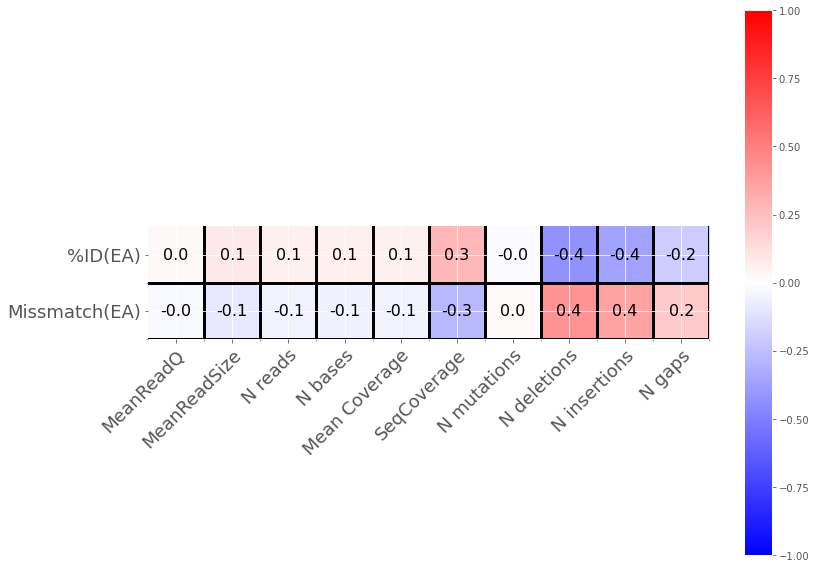

In [194]:
# CORRELATION ANALYSIS OF SYSTEM PARAMETERS 


# get variables data for correlation with IDmatch and Missmatch 
MRQ = [] # mean read quality 
MRS = [] # mean read size
NTR = [] # number of total reads 
NTB = [] # number total bases 
ASC = [] # average sample coverage 
CSC = [] # coonsensus sequence coverage (transversal coverage) 
NDM = [] # Number detected mutations
NDD = [] # Number detected deletions
NDI = [] # Number detected insertions
NTG = [] # Number total gaps 

MISS_data = [] # Miss match data output 
IDM_data = [] # Identity match output

# ordering the data with processing samples info and computing comparative indexes  
matchDiff, matchID, LowVarA, LowVarE = 0, 0, 0, 0
for k in range(len(InfoSAMPLES)):
    for j , data in enumerate(InfoSAMPLES[k]):
        MISS_data.append(MISSMATCH[k][j])
        IDM_data.append(IDVALID[k][j])
        MRQ.append(float(data[14])) 
        MRS.append(float(data[15]))  # mean read size
        NTR.append(float(data[16])) # number of total reads 
        NTB.append(float(data[17])) # number total bases 
        ASC.append(float(data[7])) # average sample coverage 
        CSC.append( (float(data[8])-float(data[9]))/len(Rseq) *100)
        NDM.append(float(data[10])) # number detected mutations
        NDI.append(float(data[11])) # number detected insertions
        NDD.append(float(data[12])) # number detected deletions
        NTG.append(float(data[13])) # number total gaps     
        
print("total data points for correlations = ", len(IDM_data))
# Computing Correlations

import numpy as np

Yname1 = ["%ID(EA)", "Missmatch(EA)" ] 
Xname2 = ["MeanReadQ","MeanReadSize", "N reads","N bases", "Mean Coverage", "SeqCoverage",
          "N mutations", "N deletions", "N insertions",  "N gaps" ] 
DATA1 =[ IDM_data, MISS_data ]
DATA2 = [MRQ, MRS, NTR, NTB, ASC, CSC, NDM, NDI, NDD,NTG] 

print("COMPUTED CORRELEATIONS:")
print("============================================================================================")

Correlations = []  
for j in range(2):
    print("\nVariables Correlation coeficient with ",Yname1[j] )
    Xj = []
    for i in range(10):
        correl_coef_XiYj = np.corrcoef(DATA2[i], DATA1[j])
        if np.isnan(correl_coef_XiYj [0][1]) :
            Xj.append(0)
            print("R(", Xname2[i], ") = 0 ")
            
        else:
            Xj.append(float(correl_coef_XiYj[0][1]))
            print("R(", Xname2[i], ") = ",correl_coef_XiYj[0][1]  )
    Correlations.append(Xj)
print("============================================================================================")
    

# ploting the correlations as an heatmap

corDATA = np.array( Correlations )

plt.clf()
fig, ax = plt.subplots(figsize = (12,8))
im = ax.imshow(corDATA, cmap = "bwr", vmin=-1, vmax=1 )
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xticks(np.arange(corDATA.shape[1]))
ax.set_yticks(np.arange(corDATA.shape[0]))
ax.set_xticklabels(Xname2, size = 18)
ax.set_yticklabels(Yname1,  size = 18)
for edge, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xticks(np.arange(corDATA.shape[1]) + 1 -.5, minor=True)
ax.set_yticks(np.arange(corDATA.shape[0]) + 1 -.5, minor=True)
ax.grid(which="minor", color="k", linestyle='-', linewidth=3)
plt.setp(ax.get_xticklabels(), rotation = 45, ha ="right",  rotation_mode = "anchor", size = 18)
for i in range(len(Yname1)):
    for j in range(len(Xname2)):
        Valueij = str(round(corDATA[i, j], 1))
        text = ax.text(j, i, Valueij, ha="center", va="center", color="k", size = 16)
fig.tight_layout()


### COMMENTS:

####  Correlation analysis demontrates that the number of insertions and deletions is a key variable that may explain the deviations of similarity between nanoERA and ARTIC. Suggests that medaka is randoomly inserting these mutations.   

#### Also sequence coverage seems to play a role in the overall metrics and pipeline tunning which makes sense. Thus, overmasking with a higher threshold of coverage may bypass erroneus predictions made by medaka. 

#### Mean read quality, number of reads and mean coverage seems to have almost no impact on the deviations. Nevertheless, one should find the minimum value necessary for the sake of preventing falling into the generation of erroneous predictions.


In [3]:
# nanoERA vs INSAFLU ID MATCH comparison using COG-UK DATA


#function for getting sequence and identifier from a fasta file   
#-------------------------------------------------------------------------------------------------------------------------- 
def import_seqs(fasta_file):
    """ 
    Imports sequences from a FASTA file path (fasta_file).
    returns a list of list
    List with one sublist per sequence in the FASTA file. Each sublist has two elements: 
    The identifier/header of the sequence  (str) and the sequence (str).
    """
    seqs = []
    nuc_to_NUC = {"a": "A","c":"C", "t":"T", "g":"G"}
    for record in SeqIO.parse(fasta_file, 'fasta'):
        seqid = record.id
        sequence = str(record.seq)
        sequence_new = ""
        if sequence[1] in ["a", "c", "t", "g" ]: 
            for nuc in sequence:
                sequence_new = sequence_new + str(nuc_to_NUC.get(nuc))
            seqs.append([seqid, sequence_new])
        else:
            seqs.append([seqid, sequence])
    return seqs
#-------------------------------------------------------------------------------------------------------------------------- 


# Extracting NanoERA GOG UK data processed report 
ReportFile = "/home/ricardo/TELE-VIRproject/NANOporeTESTdata/GOG_Covid19_Validation_dataset/nanoERA_results_INSAtest/DataProcessingReport.csv"
n = 0
ERAresults = []
F1 = open(ReportFile)
for line in F1: 
    if n!=0: 
        ERAresults.append(line.split(","))
    else:
        header= (line.split(","))
    n=n+1
F1.close()

from Bio import SeqIO
from Bio import Align

# Importing the INSAFLU consenus sequences 

INSAFLUConsensusFile = "/home/ricardo/TELE-VIRproject/NANOporeTESTdata/GOG_Covid19_Validation_dataset/ConsensusPrediction_INSAFLU.fasta"
INSAFLU_Seqs = import_seqs(INSAFLUConsensusFile)

# Importing the ARTIC consenus sequences

Reference = "/home/ricardo/TELE-VIRproject/NANOporeTESTdata/SARS_CoV_2_Wuhan_Hu_1_MN908947.fasta"
articConsensusFile = "/home/ricardo/TELE-VIRproject/NANOporeTESTdata/GOG_Covid19_Validation_dataset/COG_UK_Dataset_200seqs.fasta"
ArticSeqs = import_seqs(articConsensusFile)


# Function fot replacing NNNNN to XXXXX such as it get ignored by aligner  
def replaceNwithX(sequence):
    new_sequence = ""
    for base in sequence:
        if base =="N":
            new_sequence = new_sequence + "X"
        else:
            new_sequence = new_sequence + base
    return new_sequence


# systematic finding pars and allign

SamplesIDs2 = [data[0] for data in ERAresults]

IDmatch1 = []  # ERA vs INSA
IDmatch2 = []  # ERA vs ARTIC
IDmatch3 = []  # INSA vs ARTIC

UnmatchBases1 = []# ERA vs INSA
UnmatchBases2 = []# ERA vs ARTIC
UnmatchBases3 = [] # INSA vs ARTIC

# Aligner setup for match score
aligner1 = Align.PairwiseAligner()
aligner1.match_score = 1.0
aligner1.mismatch_score = 0.0
aligner1.gap_score = 0.0

# Aligner setup for match + missmatch score
aligner2 = Align.PairwiseAligner()
aligner2.match_score = 1.0
aligner2.mismatch_score = 1.0
aligner2.gap_score = 0.0

k = 0
print("N  sampleID", "\t" , "     % ID(EI)  %ID(EA)  %ID(IA)","\t", "EImiss" "\t", "E NNs", "\t", "I NNs", "\t", " SeqLengths(I,E,A) " )
for seq in INSAFLU_Seqs:
    IDseq = seq[0].split('_')[1]
    Iseq = "" 
    for B in seq[1]:
        if B == "-":
            B = "N"
        Iseq = Iseq + B
    Iseq2 = replaceNwithX(Iseq)
    N_I = Iseq.count("N")
    seqE_path = "not found"
    sampleID = IDseq
    for info in ERAresults:
        if IDseq == info[0] or IDseq == info[0][0:-2]:
            seqE_path = info[1]
            sampleID = info[0]
            INFO = info
            for seq in ArticSeqs:
                IDseq = seq[0].split('/')[1]
                for ID in samplesIDs:
                    if ID[1] == IDseq:
                        Aseq = seq[1]
                        Aseq2 = replaceNwithX(Aseq)
                        N_A = Aseq.count("N")
    if seqE_path !="not found":
        seqEinfo = SeqIO.read(seqE_path , "fasta")  
        Eseq = seqEinfo.seq
        Eseq2 = replaceNwithX(Eseq)       
        N_E = Eseq.count("N")
        #sequence lenghts computed by INSAFLU, nanoERA and ARTIC
        SeqLenI = len(Iseq2)
        SeqLenE = len(Eseq2)
        SeqLenA = len(Aseq2)
        #comparing nanoERA vs ISAFLU
        nMatch1 = aligner1.score(Eseq2, Iseq2)
        tMatch1 = aligner2.score(Eseq2, Iseq2)  # includes matches + missmatch 
        nMismatch1 =  int(tMatch1 - nMatch1)
        pID1 = nMatch1 / tMatch1 * 100
        #comparing nanoERA vs ARTIC
        nMatch2 = aligner1.score(Eseq2, Aseq2)
        tMatch2 = aligner2.score(Eseq2, Aseq2)  # includes matches + missmatch 
        nMismatch2 =  int(tMatch2 - nMatch2)
        pID2 = nMatch2 / tMatch2 * 100
        #comparing INSAFLU vs ARTIC
        nMatch3 = aligner1.score(Iseq2, Aseq2)
        tMatch3 = aligner2.score(Iseq2, Aseq2)  # includes matches + missmatch 
        nMismatch3 =  int(tMatch3 - nMatch3)
        pID3 = nMatch3 / tMatch3 * 100
        IDmatch1.append(pID1)
        IDmatch2.append(pID2)
        IDmatch3.append(pID3)
        UnmatchBases1.append(nMismatch1)
        UnmatchBases2.append(nMismatch2)
        UnmatchBases3.append(nMismatch3)
        k = k + 1
        IDD = sampleID + "      "
        print(k,IDD[:15] , "\t" , round(pID1, 2), "\t" , round(pID2, 2), "\t" , round(pID3, 2), "\t\t", int(nMismatch1), "\t", N_E, "\t", N_I, "\t", SeqLenI , "\t", SeqLenE,"\t", SeqLenA  )
    else:
        k = k + 1
        



N  sampleID 	      % ID(EI)  %ID(EA)  %ID(IA) 	 EImiss	 E NNs 	 I NNs 	  SeqLengths(I,E,A) 
1 ERR4239792_1    	 100.0 	 99.98 	 99.98 		 0 	 65 	 67 	 29903 	 29901 	 29903
2 ERR4243489_1    	 100.0 	 99.85 	 99.85 		 0 	 108 	 109 	 29904 	 29904 	 29903
3 ERR4243683_1    	 100.0 	 98.85 	 98.85 		 0 	 564 	 565 	 29904 	 29904 	 29903
4 ERR4243726_1    	 100.0 	 99.13 	 99.13 		 0 	 317 	 317 	 29904 	 29904 	 29903
5 ERR4246726_1    	 100.0 	 99.76 	 99.76 		 0 	 161 	 161 	 29903 	 29903 	 29903
6 ERR4246837_1    	 100.0 	 98.87 	 98.87 		 0 	 563 	 565 	 29908 	 29906 	 29903
7 ERR4246975_1    	 100.0 	 98.93 	 98.93 		 0 	 1631 	 1631 	 29912 	 29912 	 29903
8 ERR4247160_1    	 100.0 	 98.88 	 98.88 		 0 	 557 	 561 	 29904 	 29904 	 29903
9 ERR4247648_1    	 100.0 	 99.43 	 99.43 		 0 	 236 	 236 	 29903 	 29903 	 29903
10 ERR4248058_1    	 100.0 	 99.42 	 99.42 		 0 	 242 	 242 	 29904 	 29904 	 29903
11 ERR4248433_1    	 100.0 	 99.97 	 99.97 		 0 	 65 	 66 	 29903 	 29902 	 2

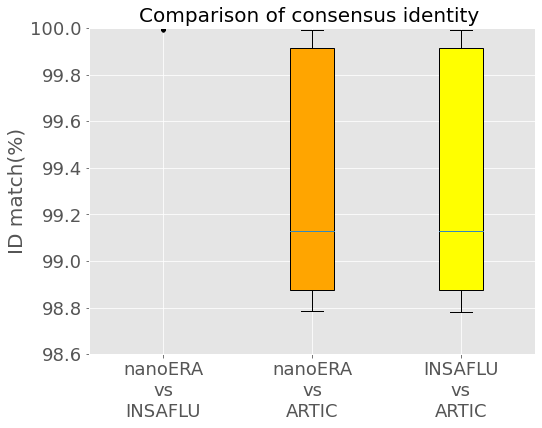

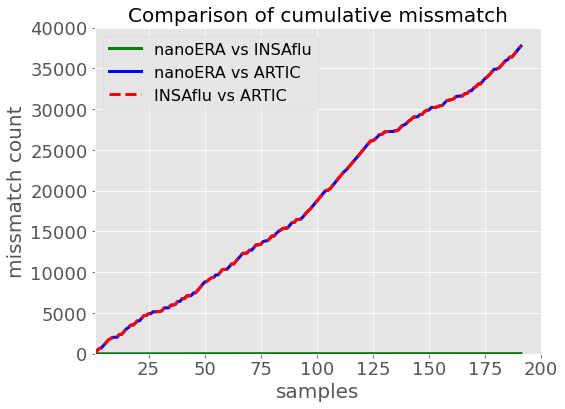

In [15]:


import numpy as np 
import matplotlib.pyplot as plt

#set

# Boxplot with variation of IDmatch NanoERA vs INSAFLU PLATFORM 

lableNames3 = [ "nanoERA\nvs\nINSAFLU", "nanoERA\nvs\nARTIC", "INSAFLU\nvs\nARTIC" ]  
DATAb3 = [ IDmatch1 , IDmatch2, IDmatch3] 

plt.clf()
plt.rcParams["figure.figsize"] = (8,6)
box1 = plt.boxplot(DATAb3, notch = False, vert =True, patch_artist = True, labels = lableNames3, 
                   flierprops = dict(markerfacecolor='k', marker='.') )
colors = [ "red", "orange", "yellow" ]
for patch, color in zip(box1["boxes"], colors ):
    patch.set_facecolor(color)

plt.title("Comparison of consensus identity ", size =20)    
plt.tick_params(axis = "both", labelsize = 18)
plt.ylim(98.6, 100)
plt.ylabel("ID match(%)", size = 20)
plt.rcParams["figure.figsize"] = (8,6)
#plt.xticks( np.arange(3) , lableNames3  ,rotation = 45)
plt.show()


# comparison of cumulative missmatched for Insaflu and nano ERA
sampleindexes = [i+1 for i in range(194) ]
cumDATA1 = np.cumsum(UnmatchBases1) 
cumDATA2 = np.cumsum(UnmatchBases2) 
cumDATA3 = np.cumsum(UnmatchBases3) 

plt.clf()
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (8,6)
plt.title("Comparison of cumulative missmatch", size = 20)    
plt.ylabel ("missmatch count", size = 20)
plt.xlabel ("samples", size = 20)  
plt.tick_params(axis = "both", labelsize = 18)
plt.rcParams["figure.figsize"] = (8,6)
plt.tick_params(axis = "both", labelsize = 18)
plt.plot( [i for i in range(len(cumDATA1))], cumDATA1 , color = "green", linewidth = 3, label="nanoERA vs INSAflu"  )
plt.plot( [i for i in range(len(cumDATA1))], cumDATA2 , "b", linewidth = 3, label="nanoERA vs ARTIC"  )
plt.plot( [i for i in range(len(cumDATA1))], cumDATA3 , "r--", linewidth = 3, label="INSAflu vs ARTIC"  )
plt.legend(fontsize = 16)
plt.axis([1, 200,0, 40000 ])
plt.show()  


### COMMENTS


####  Comparing INSAFLU consensus versus noERA consensus generated,  all samples show 100% match in terms of the consensus sequences with 0 mismatched bases.

#### There are some few disagrements in the size of the consensus sequence (up to 1 base) and also in the number of NN masked in the sequence.    

In [30]:
# TESTING A POSSIBLE AUTOMATED WAY TO WRITE A NEW CONSENSUS BASED ON VCF DATA
# in nanoERA mutations can be identifed as SNPs, Deletions and insertions

# REF SEQUECE COVID (JUST A SECTION) 
tREF = "CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT"

def PrintAlterationsLocation( prefix , SeqRef, Positions):
    LOC = prefix
    for i in range(len(SeqRef)):
        if i+1 not in Positions:
            LOC = LOC + "-"
        else:
            LOC = LOC + "*"
    print(LOC)

    
def Variants_To_Consensus(RefSeq, Positions, Mutations):        
    CONS=""
    k = 1     
    for i in range(len(RefSeq)):
        if k in Positions and i+1 == k:
            for j, pos in enumerate(Positions):
                if pos == k:
                    Mutation = Mutations[j].split("-->")[1] 
                    Type = len(Mutations[j].split("-->")[0]) - len(Mutations[j].split("-->")[1])  
                    if Type == 0:  # SNPs
                        CONS = CONS + Mutation
                        k = k + len(Mutation)    
                    if Type > 0: # Deletion
                        CONS = CONS
                        k = k + Type
                    if Type < 0: # Insertion 
                        CONS = CONS + Mutation 
                        k = k + 1
        if k not in Positions and i+1 == k:
            CONS = CONS + RefSeq[i]
            k = k + 1
    return CONS


# ASSUMING 3 different types of mutations after filtering for coverage 

consensus1 = Variants_To_Consensus(tREF, [29, 40, 50 ], ["C-->A", "A-->T", "G-->T" ] )
print("\n\n3 SNPs added on a sequence with legnth of ",len(tREF))
print("\nREFERENCE\t", tREF)
PrintAlterationsLocation("         \t",tREF, [29, 40, 50 ] )
print("CONSENSUS\t", consensus1 )

consensus2 = Variants_To_Consensus(tREF, [29], ["C-->CA" ] )
print("\n\n A insertion on position 29 added on a sequence with legnth of ",len(tREF))
print("\nREFERENCE\t", tREF)
PrintAlterationsLocation("         \t",tREF, [29 ] )
print("CONSENSUS\t", consensus2 )

consensus3 = Variants_To_Consensus(tREF, [50], ["GT-->G" ] )
print("\n\n A deletion on position 50 added on a sequence with legnth of ",len(tREF))
print("\nREFERENCE\t", tREF)
PrintAlterationsLocation("         \t",tREF, [50] )
print("CONSENSUS\t", consensus3 )

consensus4 = Variants_To_Consensus(tREF, [29, 50, 70], ["C-->T", "GTGTTC-->G", "T-->C"  ] )
print("\n\n SNPs and 5nucs deletion on position 50 added on a sequence with legnth of ",len(tREF))
print("\nREFERENCE\t", tREF)
PrintAlterationsLocation("         \t",tREF,[29, 50, 70] )
print("CONSENSUS\t", consensus4 )

consensus5 = Variants_To_Consensus(tREF, [29, 50, 70], ["C-->T", "G-->GAAAAAAAAAAAAAAAAA", "T-->C"  ] )
print("\n\n SNPs and 17 AAAs insertions on position 50 added on a sequence with legnth of ",len(tREF))
print("\nREFERENCE\t", tREF)
PrintAlterationsLocation("         \t",tREF,[29, 50, 70] )
print("CONSENSUS\t", consensus5 )




3 SNPs added on a sequence with legnth of  70

REFERENCE	 CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT
         	----------------------------*----------*---------*--------------------
CONSENSUS	 CTTAGTAGAAGTTGAAAAAGGCGTTTTGACTCAACTTGATCAGCCCTATTTGTTCATCAAACGTTCGGAT


 A insertion on position 29 added on a sequence with legnth of  70

REFERENCE	 CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT
         	----------------------------*-----------------------------------------
CONSENSUS	 CTTAGTAGAAGTTGAAAAAGGCGTTTTGCACTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT


 A deletion on position 50 added on a sequence with legnth of  70

REFERENCE	 CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT
         	-------------------------------------------------*--------------------
CONSENSUS	 CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATTGTTCATCAAACGTTCGGAT


 SNPs and 5nucs deletion on position 50 added on a sequence with legnth of 

### COMMENTS 

#### This is a simple, quick and durty way of writing a consensus based on selected positions and type of mutations

####  Ideal for implementing in nanoERA as it is direct and passes already arguments generated in the pipeline (NO NEED TO ADD COMPLEXITY ON THE TOOL).

#### Accuare inserts SNPs modifications and indels with different lenghts in given locations  
